[-100.   -1.   -2.   -1. -100. -100. -100. -100. -100.]
[  -1. -100.   -1. -100. -100. -100. -100. -100. -100.]
[  -2.   -1.   -2.   -1.   -2.  100. -100. -100. -100.]
[  -1. -100.   -1. -100.   -1. -100. -100. -100. -100.]
[  -1. -100.   -2. -100.   -2.   -1.   -2. -100. -100.]
[  -1. -100.   -1. -100.   -1. -100.   -1. -100. -100.]
[  -2.   -1.   -2.   -1.   -2. -100.   -1. -100.   -1.]
[  -1. -100.   -1. -100.   -1. -100.   -1. -100.   -1.]
[-100.   -1.   -2.   -1.   -2.   -1.   -2.   -1.   -2.]
[-100. -100.   -1. -100. -100. -100.   -1. -100. -100.]
[-100. -100. -100.   -1.   -1.   -1.   -2. -100. -100.]
Training complete!
[[3, 0], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5]] 



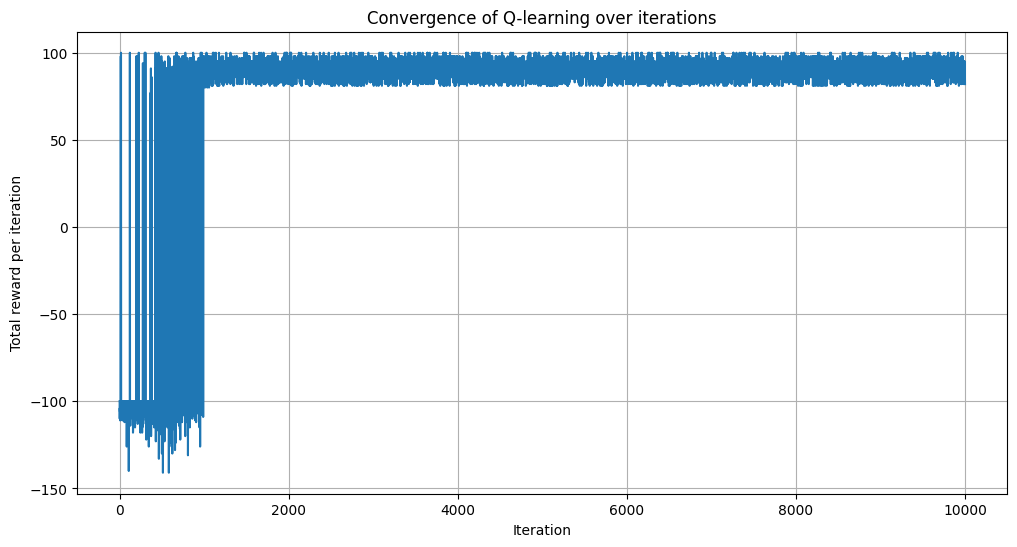

In [51]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt


#define the shape of the environment (i.e its states)
rows = 11
cols = 9
q_values = np.zeros((rows, cols, 4))
q_vals = [] # this is used for reward sums and plotting on graph
invalid = False

#define actions
#numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']


#Create a 2D numpy array to hold the rewards for each state. 
#The array contains 11 rows and 11 columns (to match the shape of the environment), and each value is initialized to -100.
rewards = np.full((rows, cols), -100.)


#define road node locations
roads = {} 
roads[0] = [1, 2, 3]
roads[1] = [0, 2]
roads[2] = [1, 3, 5]
roads[3] = [0, 2, 4]
roads[4] = [0, 5]
roads[5] = [0, 2, 4, 6]
roads[6] = [1, 3, 6, 8]
roads[7] = [0, 2, 4, 6, 8]
roads[8] = [1, 3, 5, 7]
roads[9] = [2, 6]
roads[10] = [3, 4, 5]


#define intersection node locations
intersections = {} 
intersections[0] = [2]
intersections[1] = []
intersections[2] = [0, 2, 4]
intersections[3] = []
intersections[4] = [2, 4, 6]
intersections[5] = []
intersections[6] = [0, 2, 4]
intersections[7] = []
intersections[8] = [2, 4, 6, 8]
intersections[9] = []
intersections[10] = [6]


#set the rewards for all roads and intersections
for row_index in range(0, 11):
    for column_index in roads[row_index]:
        rewards[row_index, column_index] = -1.
for row_index in range(0, 11):
    for column_index in intersections[row_index]:
        rewards[row_index, column_index] = -2.
    

#define a function that determines if the specified location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
    #if the reward for this location is -1 or -2 its a valid node (i.e. not a grey square)
    if rewards[current_row_index, current_column_index] == -1. or rewards[current_row_index, current_column_index] == -2.:
        return False
    else:
        return True


def invalid_input(row, col):
    if rewards[row, col] != -1:
        return True
    else:
        return False


#define a function that will choose a random, non-terminal starting location
def get_starting_location():
    #get a random row and column index
    current_row_index = np.random.randint(rows)
    current_column_index = np.random.randint(cols)
    #continue choosing random row and column indexes until a non-terminal state is identified
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index = np.random.randint(rows)
        current_column_index = np.random.randint(cols)
    return current_row_index, current_column_index


#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(current_row_index, current_column_index, epsilon):
    #if a randomly chosen value between 0 and 1 is less than epsilon then choose random action.
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else: #choose best action
        return np.argmax(q_values[current_row_index, current_column_index])
        

#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < cols - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index


#Define a function that will get the shortest path between any location 
def get_shortest_path(start_row_index, start_column_index, end_row_index, end_column_index):
    #return immediately if this is an invalid starting location
    if invalid_input(start_row_index, start_column_index) or invalid_input(end_row_index, end_column_index):
        print("Invalid starting or ending location. Please try again.\n")
        return []
    else: #if this is a 'legal' starting and ending location
        rewards[end_row_index, end_column_index] = 100.
        #print rewards matrix
        for row in rewards:
            print(row)
        train()
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])
        #continue moving along the path until we reach the goal (i.e., the item packaging location)
    while not is_terminal_state(current_row_index, current_column_index):
        #get the best action to take
        action_index = get_next_action(current_row_index, current_column_index, 0)
        #move to the next location on the path, and add the new location to the list
        current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
        shortest_path.append([current_row_index, current_column_index])
    return shortest_path


def train():
    #define training parameters
    epsilon = 1 #the percentage of time when we should take a random action
    epsilon_decay = 0.001
    discount_factor = 0.99 #discount factor for future rewards
    learning_rate = 0.1 #the rate at which the AI agent should learn

    #run through 10000 training episodes
    for episode in range(10000):
        sumrewards = 0
        #get the starting location for this episode
        row_index, column_index = get_starting_location()
        #continue taking actions (i.e., moving) until we reach a terminal state
        #(i.e., until we reach goal or go off the road)
        while not is_terminal_state(row_index, column_index):
            #choose which action to take (i.e., where to move next)
            action_index = get_next_action(row_index, column_index, epsilon)

            #perform the chosen action, and transition to the next state (i.e., move to the next location)
            old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
            row_index, column_index = get_next_location(row_index, column_index, action_index)
            
            #receive the reward for moving to the new state, and calculate the temporal difference
            reward = rewards[row_index, column_index]

            sumrewards += reward

            old_q_value = q_values[old_row_index, old_column_index, action_index]
            temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

            #update the Q-value for the previous state and action pair
            new_q_value = old_q_value + (learning_rate * temporal_difference)
            q_values[old_row_index, old_column_index, action_index] = new_q_value

        #append this iteration's reward total
        q_vals.append(sumrewards)

        #reduce epsilon
        epsilon -= epsilon_decay
    print('Training complete!')


def plot_data():
    new_Q_values = []
    for i in range(len(q_vals)):
        if i % 100 == 0:
            new_Q_values.append(q_vals[i])

    # Plotting the convergence of rewards over episodes
    plt.figure(figsize=(12, 6))
    plt.plot(q_vals)
    plt.title('Convergence of Q-learning over iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Total reward per iteration')
    plt.grid()
    plt.show()


# display a shortest path (uncomment the one you want to run)
print(get_shortest_path(3, 0, 2, 5), "\n")
# print(get_shortest_path(10, 3, 5, 0),  "\n") 
# print(get_shortest_path(6, 8, 8, 1), "\n")


plot_data()